# 20Ciphers_Newsgroups

### Overview

Source : https://www.kaggle.com/competitions/20-newsgroups-ciphertext-challenge/overview <br>
original dataset :http://qwone.com/~jason/20Newsgroups/

* Firstly, it’s all about encryption which means converting readable text to unreadable text.
* The Ciphertext challenge is to find the unreadable text belongs to which group?
* Now what are all the groups? There are 20News groups (20 classes) dataset having a 20000 newsgroup documents.
* This Problem is a multiclass classification problem.
* This problem is not about decrypting the given ciphertext

### Problem Statement
classification of ciphertexts are belongs to respective Newsgroups (classes)

20ciphers_Newsgroups consists of ciphertexts <br>

train_dataset consists of :<br> 
* Ciphertext : An encrypted text of a readable text <br>
* ID         : A unique ID for each ciphertext <br>
* Target     : 20 news groups are present, each ciphertext are belongs to one of the news groups <br>

Test_dataset consists of : <br>
* Ciphertext : An encrypted text of a readable text <br>
* ID         : A unique ID for each ciphertext <br>                               

We need to classify the Target group for given test_dataset ciphertexts.

### what is the use?
* By just using ML classification techniques we are able to classify Newsgroups without using any cryptographh algorithms
* we don't need to use cryptography algorithms to predict the groups ,then How will we classify?
* Machine learning Algorithms are using in Every Domain in real world. so, yes in crytpgraphy also we can use ML classification   technique's like by converting ciphertext into vectors using tfidf ,word2vec and also use some Basic techniques for Feature   
  Engineering.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score

In [2]:
x_train = pd.read_csv("train.csv") #readina train dataset from local
x_test = pd.read_csv("test.csv")

In [3]:
print(x_train.shape,x_test.shape)
x_train.info()


(5631, 3) (13142, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ciphertext  5631 non-null   object
 1   Id          5631 non-null   object
 2   target      5631 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 132.1+ KB


In [4]:
x_train.head(5)

,ciphertext,Id,target
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,ID_48096b7a9,12
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,ID_a2d6e55f4,2
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,ID_9dde342f6,11
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,ID_b637c2642,16
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,ID_51b0f15e7,3


In [5]:
# check how ciphertext looks like
a=x_train['ciphertext'][2]
print(a.replace(';',' '))
a

W)(7yqM()qMl7 HTvM)N
()8N%hNc8syPcu4MhvyO(H63()ry %TT3()ryqMHM)%v()sy_)q%H i%v (HyXM %)v7MHvy(LyG(7 cvM)yPh MHhM`y-H BM)T v
y(Ly<()8`yQHq1%Hrsyp HMTyIjsysyX(MTy%H
(HMy8H(3y(Ly%yH(H63()ry %TT3()ryqMHM)%v()y )(q)%7syL()ymGUT||y NMNy vy3 11y )(rchMy%yH(HTMHTMy3()ryucvyTv 11syuMy )(H(cHh u1MNyMNqNy1 Tq(11%Hsysy%HvMryv(yeL()hMeycTM)Tyv(y%r( vy7()MyTMhc)My %TT3()rT`syucvyTv 11yuMy7M7()%u1Mwsysy]
%H8Ty6y	M()qMya(1vsysy NTNy 1M%TMyM7% 1y7My%Ty3M11y Ly (TT u1MyeqM()qMl T
h
7  TN
()8N%hNc8es


'W)(7\x1ayqM()qMl7;HTvM)N\n()8N%hNc8syPcu4Mhv\x1ayO(H63()ry %TT3()ryqMHM)%v()sy_)q%H;i%v;(H\x1ayXM %)v7MHvy(LyG(7 cvM)yPh;MHhM`y-H;BM)T;v\ny(Ly<()8`yQHq1%Hrsyp;HMT\x1ayIjsysyX(MTy%H\n(HMy8H(3y(Ly%yH(H63()ry %TT3()ryqMHM)%v()y )(q)%7syL()ymGUT||y;NMNy;vy3;11y )(rchMy%yH(HTMHTMy3()ryucvyTv;11syuMy )(H(cHh;u1MNyMNqNy1;Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r( vy7()MyTMhc)My %TT3()rT`syucvyTv;11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy NTNy 1M%TMyM7%;1y7My%Ty3M11y;Ly (TT;u1MyeqM()qMl T\nh\x1e7; TN\n()8N%hNc8es'

In [6]:
#assuming ; is to seperate a sentences
(a.split(';'))

['W)(7\x1ayqM()qMl7',
 'HTvM)N\n()8N%hNc8syPcu4Mhv\x1ayO(H63()ry %TT3()ryqMHM)%v()sy_)q%H',
 'i%v',
 '(H\x1ayXM %)v7MHvy(LyG(7 cvM)yPh',
 'MHhM`y-H',
 'BM)T',
 'v\ny(Ly<()8`yQHq1%Hrsyp',
 'HMT\x1ayIjsysyX(MTy%H\n(HMy8H(3y(Ly%yH(H63()ry %TT3()ryqMHM)%v()y )(q)%7syL()ymGUT||y',
 'NMNy',
 'vy3',
 '11y )(rchMy%yH(HTMHTMy3()ryucvyTv',
 '11syuMy )(H(cHh',
 'u1MNyMNqNy1',
 'Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r( vy7()MyTMhc)My %TT3()rT`syucvyTv',
 '11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy NTNy 1M%TMyM7%',
 '1y7My%Ty3M11y',
 'Ly (TT',
 'u1MyeqM()qMl T\nh\x1e7',
 ' TN\n()8N%hNc8es']

In [7]:
import re
(re.split(' |;|\n',a))

['W)(7\x1ayqM()qMl7',
 'HTvM)N',
 '()8N%hNc8syPcu4Mhv\x1ayO(H63()ry',
 '%TT3()ryqMHM)%v()sy_)q%H',
 'i%v',
 '(H\x1ayXM',
 '%)v7MHvy(LyG(7',
 'cvM)yPh',
 'MHhM`y-H',
 'BM)T',
 'v',
 'y(Ly<()8`yQHq1%Hrsyp',
 'HMT\x1ayIjsysyX(MTy%H',
 '(HMy8H(3y(Ly%yH(H63()ry',
 '%TT3()ryqMHM)%v()y',
 ')(q)%7syL()ymGUT||y',
 'NMNy',
 'vy3',
 '11y',
 ')(rchMy%yH(HTMHTMy3()ryucvyTv',
 '11syuMy',
 ')(H(cHh',
 'u1MNyMNqNy1',
 'Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r(',
 'vy7()MyTMhc)My',
 '%TT3()rT`syucvyTv',
 '11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy',
 'NTNy',
 '1M%TMyM7%',
 '1y7My%Ty3M11y',
 'Ly',
 '(TT',
 'u1MyeqM()qMl',
 'T',
 'h\x1e7',
 '',
 'TN',
 '()8N%hNc8es']

In [8]:
from caesarcipher import CaesarCipher as cc


In [9]:
decipher = cc(a.replace(';',' '),offset=4)
decipher.decoded

'S)(7\x1aumI()mIh7 DPrI)J\n()8J%dJy8ouLyq4Idr\x1auK(D63()nu %PP3()numIDI)%r()ou_)m%D e%r (D\x1auTI %)r7IDru(HuC(7 yrI)uLd IDdI`u-D XI)P r\nu(Hu<()8`uMDm1%Dnoul DIP\x1auEfououT(IPu%D\n(DIu8D(3u(Hu%uD(D63()nu %PP3()numIDI)%r()u )(m)%7ouH()uiCQP||u JIJu ru3 11u )(nydIu%uD(DPIDPIu3()nuqyruPr 11ouqIu )(D(yDd q1IJuIJmJu1 Pm(11%Douou\x03%DrInur(uaH()dIauyPI)Pur(u%n( ru7()IuPIdy)Iu %PP3()nP`ouqyruPr 11uqIu7I7()%q1Isouou]\x1e%D8Pu6u\tI()mIuw(1rouou JPJu 1I%PIuI7% 1u7Iu%Pu3I11u Hu (PP q1IuamI()mIh P\nd\x1e7  PJ\n()8J%dJy8ao'

In [10]:
# key = b'This is a key123'


# decipher = AES.new(key,AES.MODE_CFB,'this is an IV456')

# decode = decipher.decrypt(a*16)

# decode

* cryptography alogorithms are not worked because of without knowing the key we cannot decode

In [11]:
#sentiment analysis for polarity scores
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
x_train_sentiment_scores = x_train['ciphertext'].apply(sid.polarity_scores).apply(pd.Series) 
x_test_sentiment_scores = x_test['ciphertext'].apply(sid.polarity_scores).apply(pd.Series) 


In [12]:
y_distribution = x_train['target'].value_counts().sort_index() # assigning target values
y_distribution

0     244
1     288
2     291
3     283
4     282
5     274
6     279
7     305
8     306
9     326
10    288
11    312
12    300
13    288
14    275
15    328
16    286
17    276
18    219
19    181
Name: target, dtype: int64

Text(0.5, 1.0, 'distribution of classes')

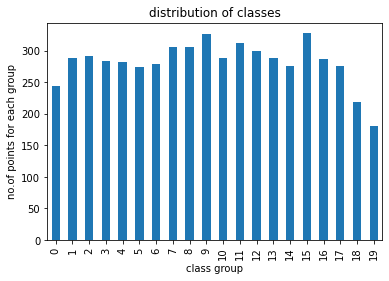

In [13]:
y_distribution.plot(kind ='bar') #we are trying to plot the barplot to visulaize the class groups
plt.xlabel("class group")
plt.ylabel("no.of points for each group")
plt.title("distribution of classes")

* This is a distribution plot for classes(20groups)
* In this distribution we can see each class on x-axis and
* also we can see no.of data points for each class on y-axis
* from this plot we can observe every group contains more than 150 data points

In [14]:
import re
spec_char = re.compile('[@_!#$%^&*()<>:?/\|}{~]') #using regular expressions to identify special characters in ciphertext

### Feature Engineering using ciphertext

In [15]:
# source:https://www.kaggle.com/code/opanichev/lightgbm-and-simple-features/script
# above resource page helps to create new Basic features

x_train['length']             = x_train['ciphertext'].apply(lambda x : len(x))  #length of ciphertext
x_train['len_of_digits']      = x_train['ciphertext'].apply(lambda x : len([i for i in x if i.isdigit()])) #number of digits preset in each cipher text
x_train['special_characters'] = x_train['ciphertext'].apply(lambda x : len([i for i in x if spec_char.search(i)])) # no.of special characters in ciphertext
x_train['small_case']         = x_train['ciphertext'].apply(lambda x : len([i for i in x if i.islower()]))# no.of lower case alphabets in ciphertext
x_train['upper_case']         = x_train['ciphertext'].apply(lambda x : len([i for i in x if i.isupper()]))# no.of upper case alphabets in ciphertext

# considering ';' as end of one sentence in a cipher text
x_train['no_of_sentences']    = x_train['ciphertext'].apply(lambda x : len(x.split(';')))

############################################ on test_data
x_test['length']             = x_test['ciphertext'].apply(lambda x : len(x))  #length of ciphertext
x_test['len_of_digits']      = x_test['ciphertext'].apply(lambda x : len([i for i in x if i.isdigit()])) #number of digits preset in each cipher text
x_test['special_characters'] = x_test['ciphertext'].apply(lambda x : len([i for i in x if spec_char.search(i)])) # no.of special characters in ciphertext
x_test['small_case']         = x_test['ciphertext'].apply(lambda x : len([i for i in x if i.islower()]))# no.of lower case alphabets in ciphertext
x_test['upper_case']         = x_test['ciphertext'].apply(lambda x : len([i for i in x if i.isupper()]))# no.of upper case alphabets in ciphertext

# considering ';' as end of one sentence in a cipher text
x_test['no_of_sentences']    = x_test['ciphertext'].apply(lambda x : len(x.split(';')))


### apply percentage on few features

In [16]:
# below features are % values of each row with respective features (length,len_of_digits,no.of.sentences)

x_train['per_length']          = x_train['length'].apply(lambda x : 100*x/len(x_train['length']))
x_train['per_len_of_digits']   = x_train['len_of_digits'].apply(lambda x : 100*x/len(x_train['len_of_digits']))
x_train['per_no_of_sentences'] = x_train['no_of_sentences'].apply(lambda x : 100*x/x_train['no_of_sentences'].sum())

######################################## on test_data
x_test['per_length']          = x_test['length'].apply(lambda x : 100*x/len(x_train['length']))
x_test['per_len_of_digits']   = x_test['len_of_digits'].apply(lambda x : 100*x/len(x_train['len_of_digits']))
x_test['per_no_of_sentences'] = x_test['no_of_sentences'].apply(lambda x : 100*x/x_train['no_of_sentences'].sum())

In [17]:
x_train['ciphertext'][2].split(' ')

['W)(7\x1ayqM()qMl7;HTvM)N\n()8N%hNc8syPcu4Mhv\x1ayO(H63()ry',
 '%TT3()ryqMHM)%v()sy_)q%H;i%v;(H\x1ayXM',
 '%)v7MHvy(LyG(7',
 'cvM)yPh;MHhM`y-H;BM)T;v\ny(Ly<()8`yQHq1%Hrsyp;HMT\x1ayIjsysyX(MTy%H\n(HMy8H(3y(Ly%yH(H63()ry',
 '%TT3()ryqMHM)%v()y',
 ')(q)%7syL()ymGUT||y;NMNy;vy3;11y',
 ')(rchMy%yH(HTMHTMy3()ryucvyTv;11syuMy',
 ')(H(cHh;u1MNyMNqNy1;Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r(',
 'vy7()MyTMhc)My',
 '%TT3()rT`syucvyTv;11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy',
 'NTNy',
 '1M%TMyM7%;1y7My%Ty3M11y;Ly',
 '(TT;u1MyeqM()qMl',
 'T\nh\x1e7;',
 'TN\n()8N%hNc8es']

doesn't seems liks we split the words , lets try by using ' ' and ;

In [18]:
re.split(' |;',x_train['ciphertext'][2])

['W)(7\x1ayqM()qMl7',
 'HTvM)N\n()8N%hNc8syPcu4Mhv\x1ayO(H63()ry',
 '%TT3()ryqMHM)%v()sy_)q%H',
 'i%v',
 '(H\x1ayXM',
 '%)v7MHvy(LyG(7',
 'cvM)yPh',
 'MHhM`y-H',
 'BM)T',
 'v\ny(Ly<()8`yQHq1%Hrsyp',
 'HMT\x1ayIjsysyX(MTy%H\n(HMy8H(3y(Ly%yH(H63()ry',
 '%TT3()ryqMHM)%v()y',
 ')(q)%7syL()ymGUT||y',
 'NMNy',
 'vy3',
 '11y',
 ')(rchMy%yH(HTMHTMy3()ryucvyTv',
 '11syuMy',
 ')(H(cHh',
 'u1MNyMNqNy1',
 'Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r(',
 'vy7()MyTMhc)My',
 '%TT3()rT`syucvyTv',
 '11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy',
 'NTNy',
 '1M%TMyM7%',
 '1y7My%Ty3M11y',
 'Ly',
 '(TT',
 'u1MyeqM()qMl',
 'T\nh\x1e7',
 '',
 'TN\n()8N%hNc8es']

* looks good lets try with \n because "TN\n()8N%hNc8es" it will count as 1 word but it should be like 'TN' and '()8N%hNc8es'.
* Here we did same by spliting , and ;

In [19]:
re.split(' |;|\n',x_train['ciphertext'][2])

['W)(7\x1ayqM()qMl7',
 'HTvM)N',
 '()8N%hNc8syPcu4Mhv\x1ayO(H63()ry',
 '%TT3()ryqMHM)%v()sy_)q%H',
 'i%v',
 '(H\x1ayXM',
 '%)v7MHvy(LyG(7',
 'cvM)yPh',
 'MHhM`y-H',
 'BM)T',
 'v',
 'y(Ly<()8`yQHq1%Hrsyp',
 'HMT\x1ayIjsysyX(MTy%H',
 '(HMy8H(3y(Ly%yH(H63()ry',
 '%TT3()ryqMHM)%v()y',
 ')(q)%7syL()ymGUT||y',
 'NMNy',
 'vy3',
 '11y',
 ')(rchMy%yH(HTMHTMy3()ryucvyTv',
 '11syuMy',
 ')(H(cHh',
 'u1MNyMNqNy1',
 'Tq(11%Hsysy\x03%HvMryv(yeL()hMeycTM)Tyv(y%r(',
 'vy7()MyTMhc)My',
 '%TT3()rT`syucvyTv',
 '11yuMy7M7()%u1Mwsysy]\x1e%H8Ty6y\tM()qMya(1vsysy',
 'NTNy',
 '1M%TMyM7%',
 '1y7My%Ty3M11y',
 'Ly',
 '(TT',
 'u1MyeqM()qMl',
 'T',
 'h\x1e7',
 '',
 'TN',
 '()8N%hNc8es']

In [20]:
#x_train['cipher_text'] = x_train['ciphertext'].apply(lambda x : x.replace(';',' '))
#x_train['cipher_text'] = x_train['cipher_text'].apply(lambda x : [ for i in x if i=='\n'] )
#x_train['cipher_text'] = x_train['cipher_text'].apply(lambda x : x.replace('\n',' '))
x_train['no_of_words'] = x_train['ciphertext'].apply(lambda x : len(re.split(' |;|\n',x))) # splitiing the no.of words in a ciphertext by using '',;and \n.

############################################## on test_data
#x_test['cipher_text'] = x_test['ciphertext'].apply(lambda x : x.replace(';',' '))
#x_train['cipher_text'] = x_train['cipher_text'].apply(lambda x : [ for i in x if i=='\n'] )
#x_test['cipher_text'] = x_test['cipher_text'].apply(lambda x : x.replace('\n',' '))
x_test['no_of_words'] = x_test['ciphertext'].apply(lambda x : len(re.split(' |;|\n',x))) # splitiing the no.of words in a ciphertext by using '',;and \n.


In [21]:
#x_train = x_train.drop(['ciphertext'],axis=1)
x_train.head(5)

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,ID_48096b7a9,12,1268,95,214,467,326,52,22.518203,1.687089,0.010764,82
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,ID_a2d6e55f4,2,1053,65,153,468,242,37,18.700053,1.154324,0.007659,53
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,ID_9dde342f6,11,491,49,99,166,127,19,8.719588,0.870183,0.003933,38
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,ID_b637c2642,16,946,69,164,331,233,49,16.799858,1.225360,0.010143,71
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,ID_51b0f15e7,3,2775,224,593,1001,578,110,49.280767,3.977979,0.022770,167


In [22]:
#x_test = x_test.drop(['ciphertext'],axis=1)
x_test.head(5)

,ciphertext,Id,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words
0,Pcu4MhvyQmQ}]Py_OyQX@}Xy\QOOQ}NNNp__9wwwsyW...,ID_e93d1d4c6,406,36,87,136,95,23,7.210087,0.639318,0.004761,34
1,W)(7y41Tl%vq1%uN%vqNh(7y^\M)(7MyPh HM;rM)/sy}...,ID_f5f7560ec,3890,305,648,1464,944,192,69.081868,5.416445,0.039744,286
2,W)(7yM);hTlHMvh(7Nh(7y^Q);hyP7;v /syPcu4Mhvy...,ID_6ebe8f07f,1355,95,222,527,323,71,24.063221,1.687089,0.014697,97
3,W)(7yr%BMlTM%B;M3NuTrNch ;h%q(NMrcy^X%BMy\t);...,ID_26222d9b7,1482,100,255,567,333,80,26.318594,1.775884,0.016560,120
4,W)(7yM%Tc?&Il();(HN(%hNch;NMrcy^Pci%HH%y]NyG ...,ID_a0632653b,851,51,177,302,215,46,15.112769,0.905701,0.009522,65


In [23]:
x_train_sentiment_scores.drop([1060],axis=0,inplace=True)

In [332]:
x_train.to_csv('data.csv')

## Univariate analysis on length of cipher text

In [24]:
print(x_train[x_train['length'].isna()]) 
print(x_train[x_train['length'].isnull()])

Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words]
Index: []
Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words]
Index: []


* we can say there is no missing and null values

In [35]:
# for label, data in x_train.groupby('target'):
#     counts,bin_edges = np.histogram(data['length'],bins=15,density=True)
#     #print(counts,bin_edges)
#     cdf = np.cumsum(counts/(sum(counts)))
#     #plt.figure()
#     plt.plot(bin_edges[1:],cdf,label=label)
#     plt.legend()


In [25]:
#plotting a scatter plots for every individula feature to visualize how features will helful to classify the groups
def scatterplots(x1,y,data):
    
   # plt.subplot(1,1,1)
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue=y,height=6)\
       .map(plt.scatter,x1,y)\
       .add_legend()
    plt.title("scatterplots of {0} for given ciphertexts".format(x1))
    
    plt.figure()
    for label,dt in data.groupby(y):
        counts,bin_edges = np.histogram(dt[x1],bins=15,density=True)
        #print(counts,bin_edges)
        cdf = np.cumsum(counts/(sum(counts)))
        sns.set_style('whitegrid')
        #plt.figure()
        plt.xlabel('length')
        plt.ylabel('density')
        plt.plot(bin_edges[1:],cdf,label=label)
        plt.legend()
    plt.title("cdfs of every target class for {}".format(x1))    

    
#     #plt.subplot(1,2,2)
#     sns.set_style('whitegrid')
#     sns.FacetGrid(x_train,hue=y,height=6)\
#        .map(plt.scatter,x2,y)\
#        .add_legend()
#     plt.title("scatterplots of {0} for given ciphertexts".format(x2))


    

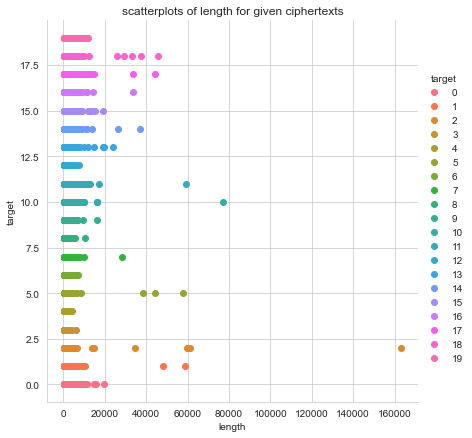

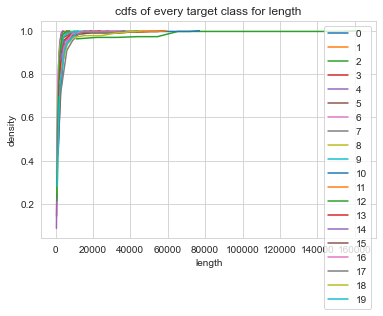

In [26]:
#scatterplots for length and %_length feature

scatterplots('length','target',x_train) 


* scatterplot on length and %_lenght features
* Distribution of both plots are looks similar so we can use any one of the feature
* we can clearly observe there is one outlier point on class group 2 , because of this outlier we will get wrong results
* length of ciphertexts of all the class groups are mostly <=20000
* we can observe if length is in between 70k and 80k, then that point might be a class group 10
* and we can also say if data point lie in between 60k and 80k, then that datpoint could be a class groups 1,2,5,10 and 11
* we plot the cdf of length for each target class but cdf's are close to each other 
* one thing we can sure is by looking at the cdf 98% of data lies <=20000
### conclusion
* outlier has to be removed or apply some techniques to get rid of it
* we can either use both features or anyone of it

### histogram plots on length vs log(length)

In [27]:
# plotting a histogram plot for every feature to check how the features helps us to classify

def histogramplots(x,y,data):
    #plt.subplot(1,2,1)
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue=y,height=6) \
       .map(sns.histplot,x) \
       .add_legend()
    plt.title("histplot on {0} of ciphertexts".format(x))

    #plt.subplot(1,2,2)
    data['log_value']=np.log(data[x])
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue=y,height=6) \
       .map(sns.histplot,'log_value') \
       .add_legend()
    plt.title("histplot on {} log values of length of ciphertext".format(x))

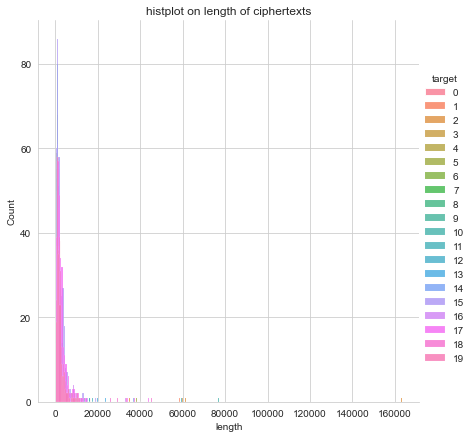

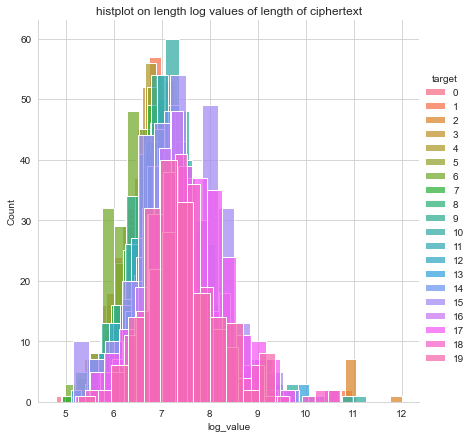

In [28]:
histogramplots('length','target',x_train)
#histogramplots('%_length','target',x_train)

* ploting a histogram on length of cipher texts.
* both the plots are same distributions only difference is 2nd plot is percentage of length (%_lenght).
* we can observe one thing from this plot is most of the data / length of ciphertexts are in the range of 20000.
* we can observe if point has a high density in between length of 0 to 100 and density above 60 to 80 that could be a class
  or group 15.
* there is a one datapoint which is farther away from all the other points which means length of ciphertext is very high(163244),its   an outlier.  
* we can use total length feature alone because %_length is also giving same observations
* log(length) distribution looks more clear but all are overlapped
* we can say target 19 in between log_value of (5.2 to 9.5) and count <40 
### conclusion
* we can remove the outlier from class 2 and  %_length feature


In [29]:
a=x_train[x_train['length']==163224]
a

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value
1060,W)(7yrucT (Hql3%HqNh(7y^X%BMyacT (Hq/syPcu4Mh...,ID_414f6cee5,2,163224,11921,33125,41148,38491,86,2898.668087,211.703072,0.017802,130,12.002879


In [30]:
x_train.drop([1060],axis=0,inplace=True)

In [31]:
a=x_train[x_train['length']==163224]
a

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value


## univariate analysis on len of digits

In [32]:
print(x_train[x_train['len_of_digits'].isna()]) 
print(x_train[x_train['len_of_digits'].isnull()])

Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []
Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []


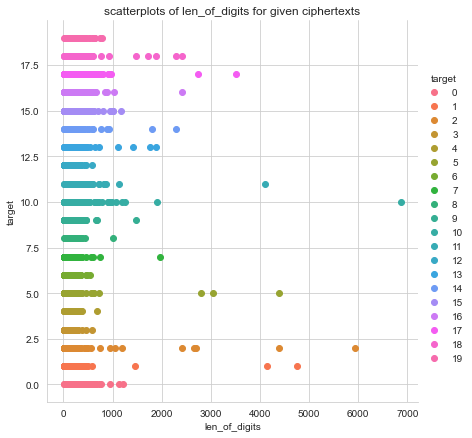

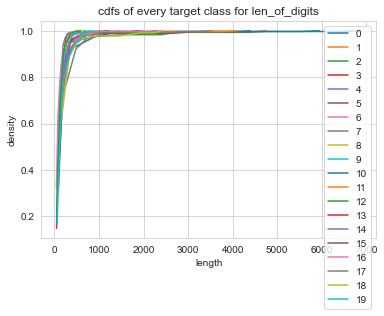

In [33]:
#scatter plots for len_of_digits and %_len_of_digits features
scatterplots('len_of_digits','target',x_train)

* here also we can clearly observe the outlier at class group 2
* number of digits in all ciphertexts for each class mostly <2000
* we can observe if number of digits are in range(4000,6000) then those data points may belongs to either class group 1 or 2
* we can clearly observe class group 10 if no.of.digits is near to 70k
* In between 2k and 4k , might be 2,5,17 and 18
### conclusion
* we might be able to classify few groups by looking the scatter plots.
* These fetures useful to identify the classgroups

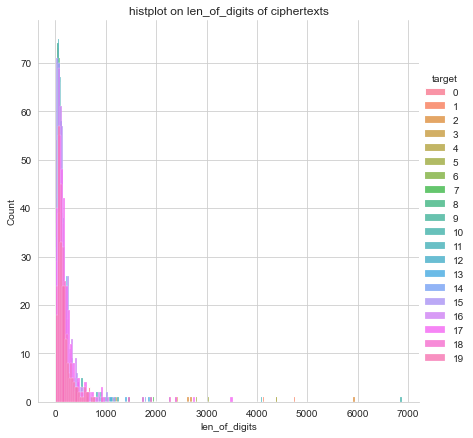

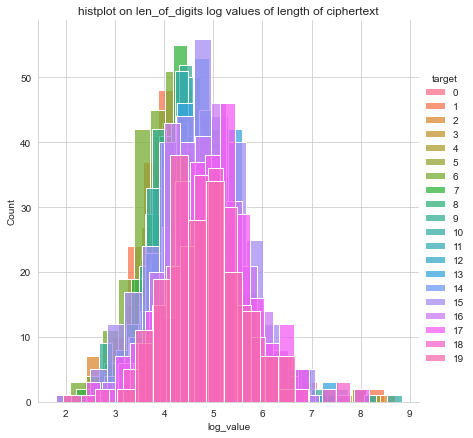

In [34]:
#histogram plot for len_of_digits feature 

histogramplots('len_of_digits','target',x_train)
#histogramplots('%_len_of_digits','target',x_train)

* ploting a histograms on length of digits(number of digits) in ciphertext
* from the above plots we can observe most of the data or number of digits in all the ciphertexts are <2000 
* only few data points have number of digits in ciphertext are greater than 2000
* visualization of log(len_of_digits) plot is much clear than len_of_digits plot
* here also we can observe target 19 easily
### conclusion
* There is no much info to classify the class groups using histogram plots


## univariate analysis on special characters

In [35]:
print(x_train[x_train['special_characters'].isna()]) 
print(x_train[x_train['special_characters'].isnull()])

Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []
Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []


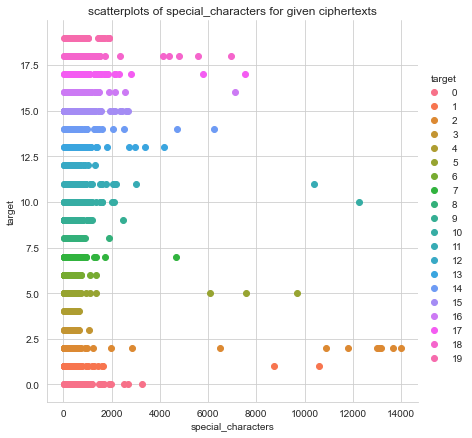

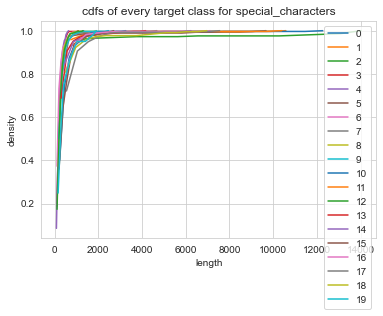

In [36]:
#scatter plot on special characters 
scatterplots('special_characters','target',x_train)

* Here also we can see outlier at class group 2 ,because of 1 cipher text every feature is impacting.
* number of special characters of each class is less than 5000
* we can clearly observe if no.of.special characters is in between 10k and 15k then that point might be classgroup 2 
* we can also observe if no.of.characters is in between 5k and 10k then those point might belongs to 5,17 and 18 class groups
### conclusion
* yes, here also we can classify few class labels

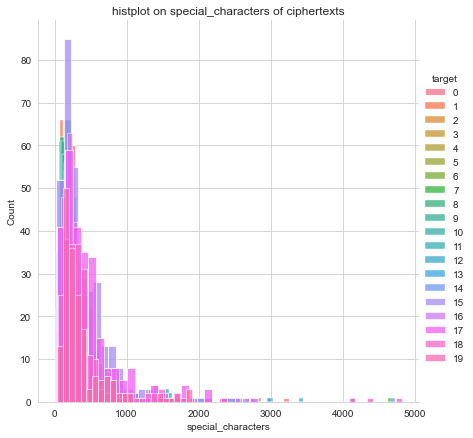

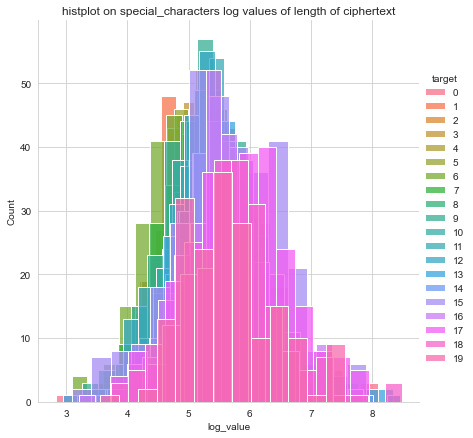

In [37]:
#filtered the data less than 5000 special characters in ciphertext using above scatter plot
data = x_train[x_train['special_characters']<5000]
#histogramplots('special_characters','target',x_train)
histogramplots('special_characters','target',data)

* By filtering out some data we plot the histogram plot
* plot looks good comparing with unfiltered data but we can't visualize properly because of overlapping
* but we can observe class group 15 has hight count at certain point
* here also log_value histogram is looks clear but overlapping and same we can observe class 19

## univariate analysis for no.of sentences

In [38]:
print(x_train[x_train['no_of_sentences'].isna()]) 
print(x_train[x_train['no_of_sentences'].isnull()])

Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []
Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []


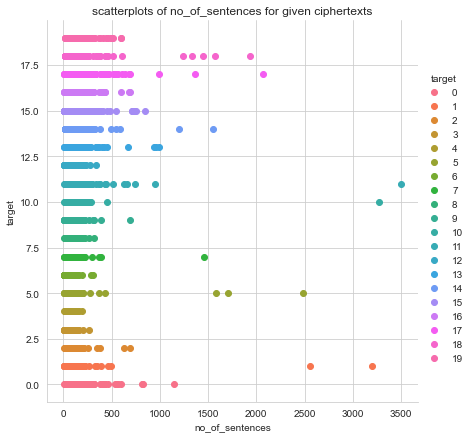

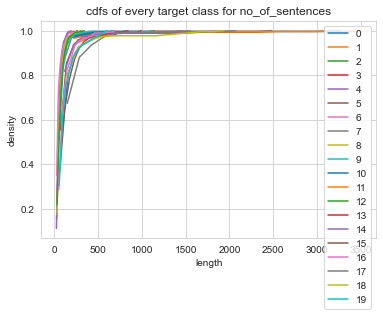

In [39]:
#scatter plots on no.of sentences and  %_no.of sentences
scatterplots('no_of_sentences','target',x_train)

* This plots somewhat looks different compared to previous features plots
* no.of sentences in each ciphertexts for each class labels are mostly <800
* we can observe if number of sentences in between 1250 and 1500 ,then that point might belongs to class group 18
* few class groups 2,5,10,17 and 18 have more than 1500 sentences in some ciphertexts

### conclusion
* we can classify using any one these features

histograms are not ploting because of not useful

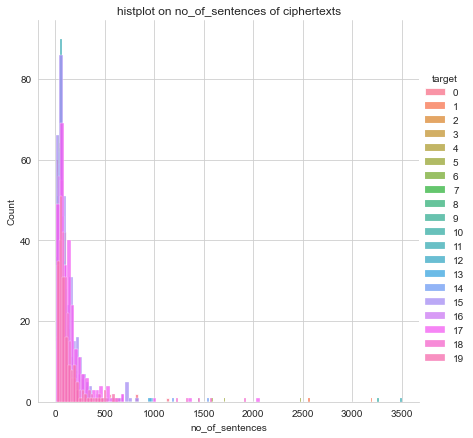

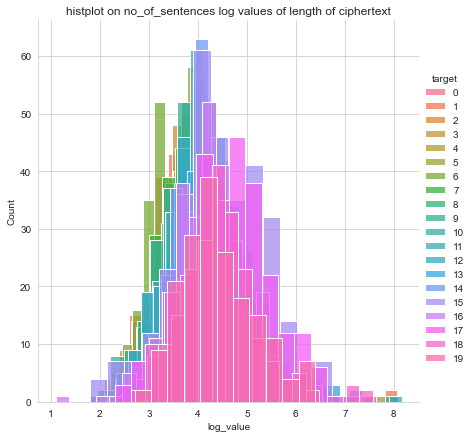

In [40]:
histogramplots('no_of_sentences','target',x_train)

* By looking at the above plots one thing is sure that target 13,14 having large no.of.sentences compared to another classes
* target 6 at log_value 3.2 and count 52, we can say target 6 in that range

## univariate analysis on uppercase and lower case features

In [41]:
print(x_train[x_train['upper_case'].isna()]) 
print(x_train[x_train['small_case'].isnull()])

Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []
Empty DataFrame
Columns: [ciphertext, Id, target, length, len_of_digits, special_characters, small_case, upper_case, no_of_sentences, per_length, per_len_of_digits, per_no_of_sentences, no_of_words, log_value]
Index: []


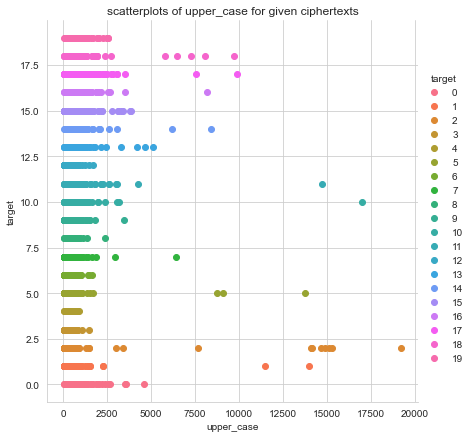

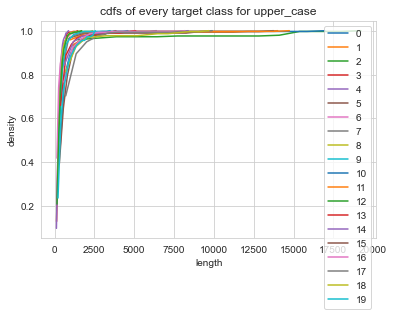

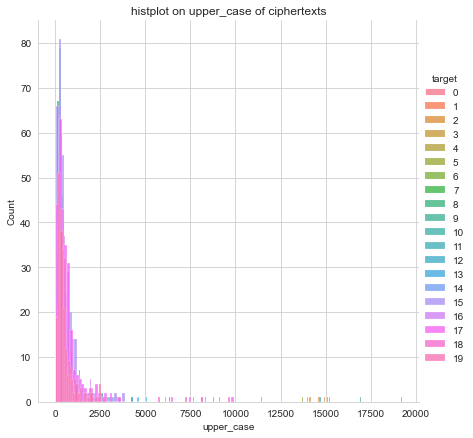

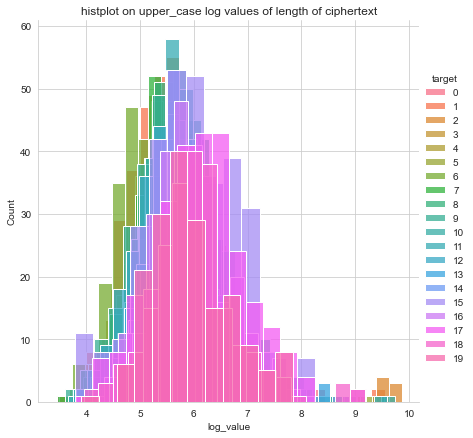

In [42]:
#scatterplots on upper_case and lower_case features
scatterplots('upper_case','target',x_train)
histogramplots('upper_case','target',x_train)


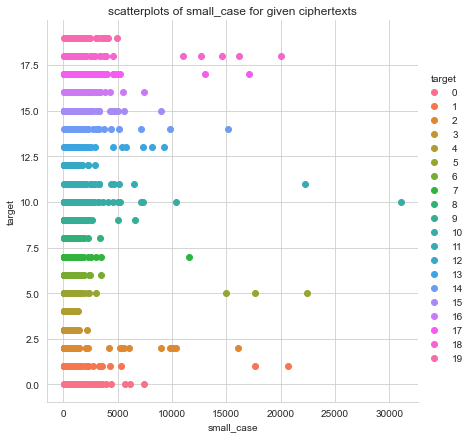

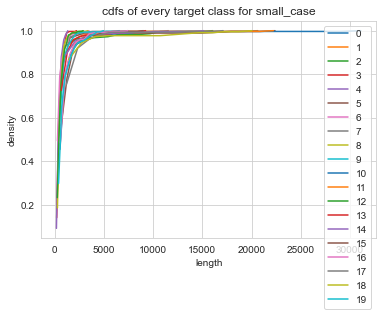

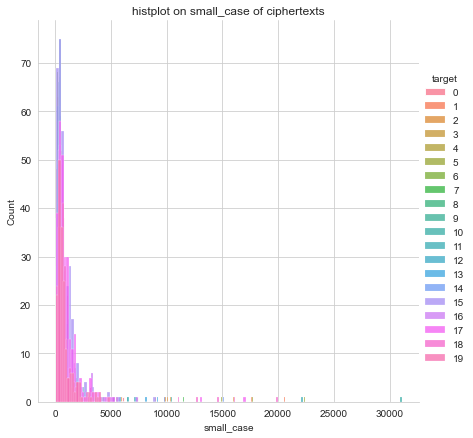

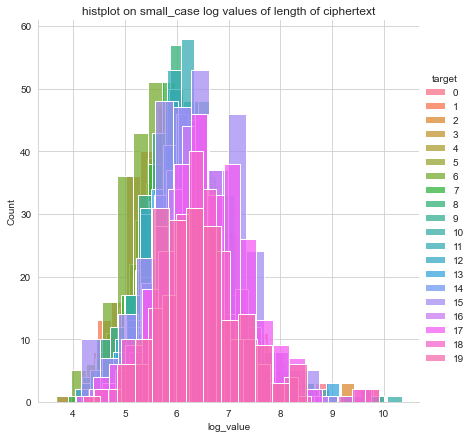

In [45]:
scatterplots('small_case','target',x_train)
histogramplots('small_case','target',x_train)


* scatter plots on smallcase and uppercase alphabets
* both plots are looks different
* most of the uppercase letters are < 5000 and lowercase letters <10000
* if length of upper case is in between 14k and 15k that point might be class group 2
* if length of smallcase between(10k and 20k) and uppercase between(5k and 10k) then that point might be 5 and 18 classgroups

### conclusion
* These two features are definitely helpful to classify the classgroup


### we can observe few class labels by univariate analysis now lets try Bivariate analysis

# Bivariate analysis 

In [46]:
x_train

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,ID_48096b7a9,12,1268,95,214,467,326,52,22.518203,1.687089,0.010764,82,6.146329
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,ID_a2d6e55f4,2,1053,65,153,468,242,37,18.700053,1.154324,0.007659,53,6.148468
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,ID_9dde342f6,11,491,49,99,166,127,19,8.719588,0.870183,0.003933,38,5.111988
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,ID_b637c2642,16,946,69,164,331,233,49,16.799858,1.225360,0.010143,71,5.802118
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,ID_51b0f15e7,3,2775,224,593,1001,578,110,49.280767,3.977979,0.022770,167,6.908755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,W)(7y77%HH;Hql;h(7T;7Nh(7y^C;h %M1yC%HH;Hq/sy...,ID_c52813363,8,1137,103,203,404,274,48,20.191795,1.829160,0.009936,82,6.001415
5627,_)q%H;i%v;(HyPv%HL()ryp;HM%)y@hhM1M)%v()yGMHv...,ID_bcf3c2d23,1,1116,46,173,515,249,37,19.818860,0.816906,0.007659,67,6.244167
5628,W)(7yL)%H8lXjI0P+&nNcch y^W)%H8y_UX3\nM)/syPc...,ID_ad45bfbe4,0,2492,193,445,954,531,160,44.255017,3.427455,0.033120,228,6.860664
5629,W)(7y7;h %M1l4MTvM)N\t-ONrMy^C;h %M1y\tM) %)r...,ID_99ab693a9,3,1264,88,208,486,330,58,22.447167,1.562777,0.012006,75,6.186209


## pairplots on features

In [51]:
dt= x_train[['length','len_of_digits','special_characters','small_case','upper_case','no_of_sentences','no_of_words','target']]

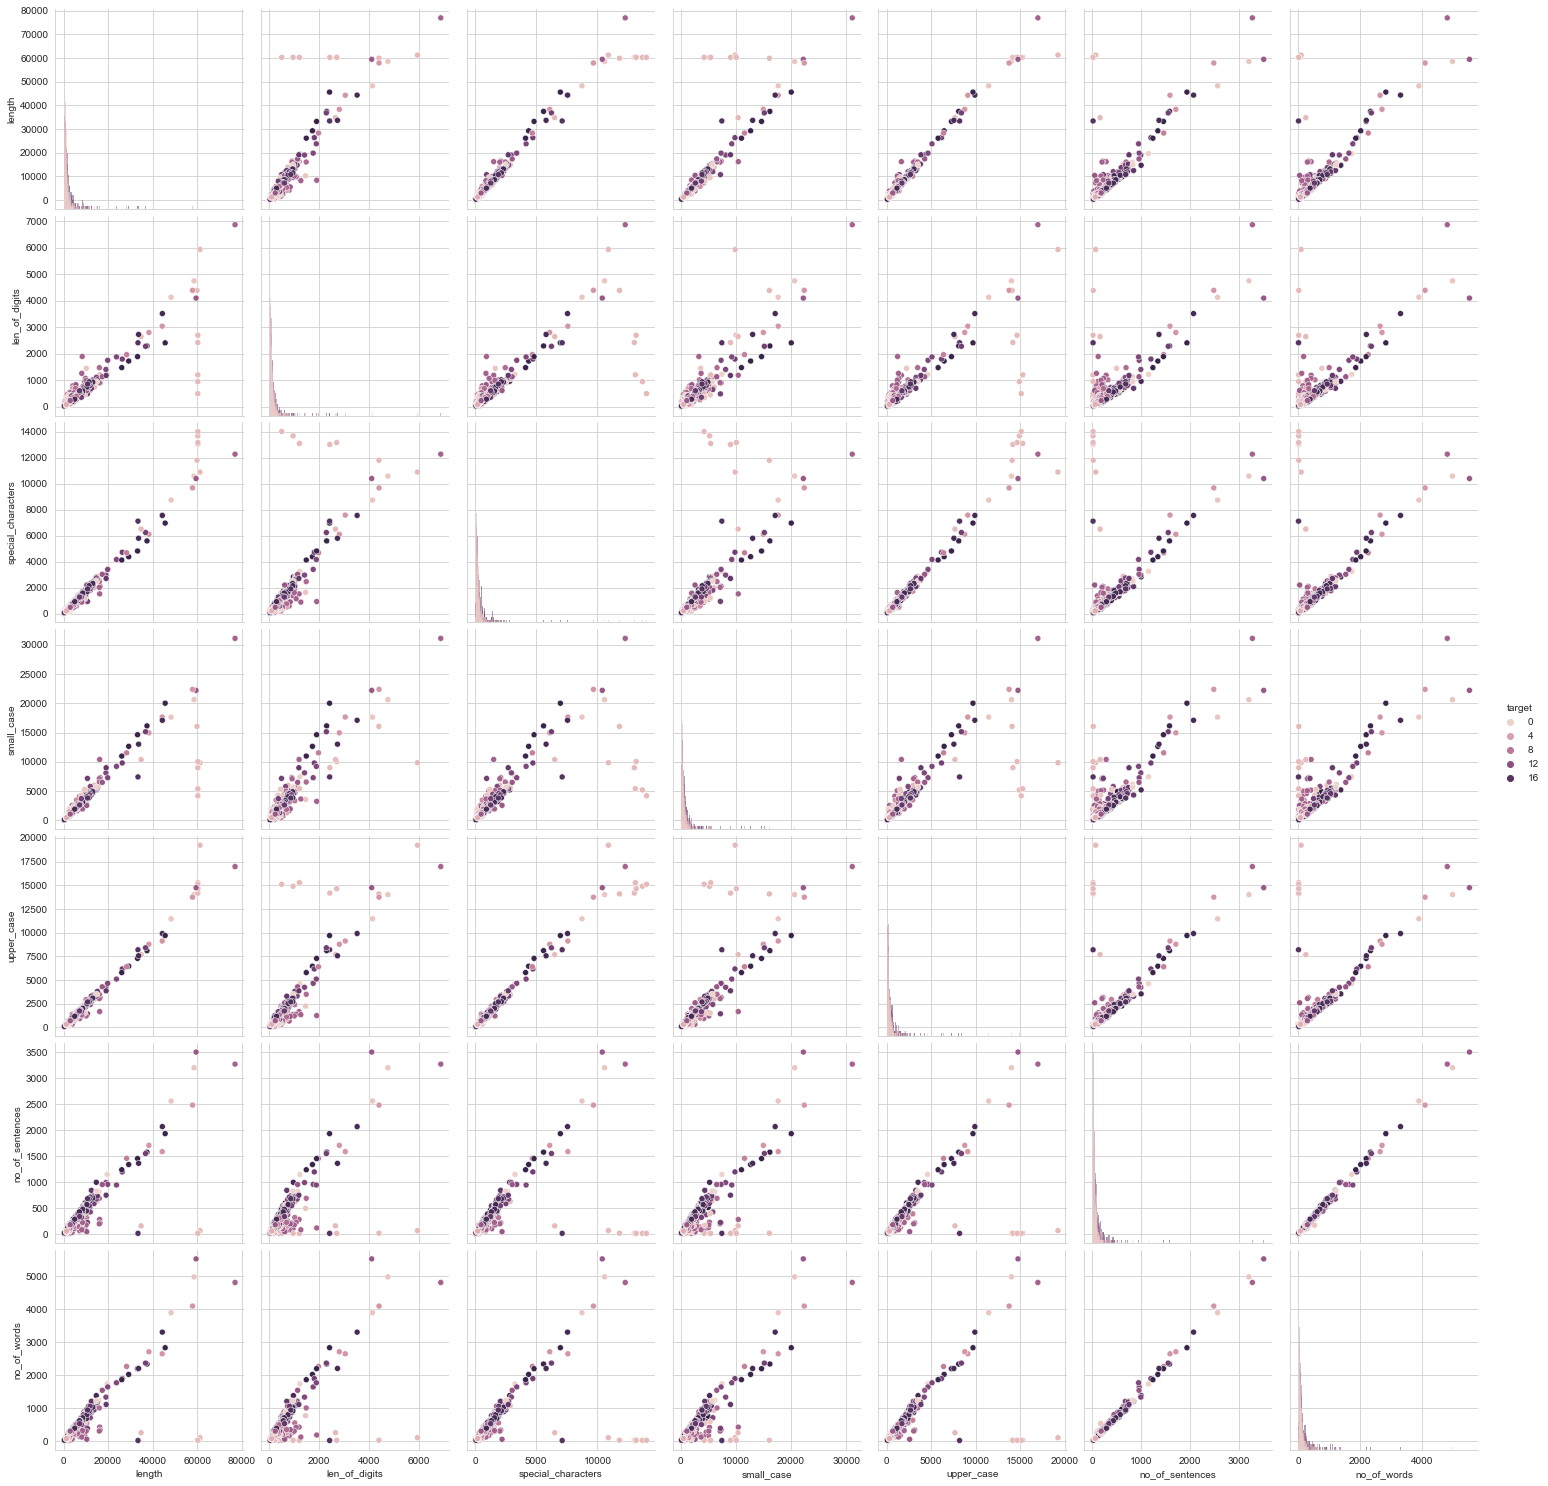

In [56]:
sns.set_style("whitegrid")
sns.pairplot(dt,diag_kind='hist',hue='target',height=3)
plt.show()

* we cannot visualize properly by looking into pairplot because of more features
* lets try another plotting techniques for bivariate analysis

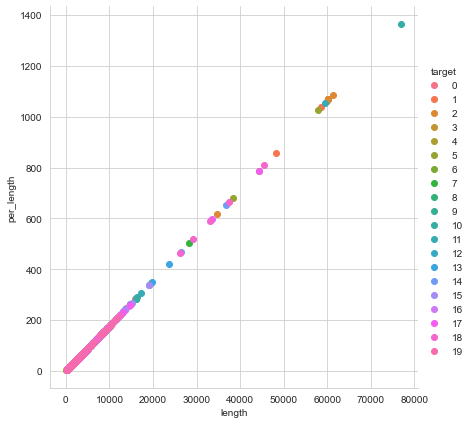

In [52]:
#plt.scatter('special_characters','target',data)

sns.set_style('whitegrid')
sns.FacetGrid(x_train,hue='target',height=6)\
   .map(plt.scatter,'length','per_length')\
   .add_legend()
plt.show()

* There is nothing to observe here just plot the same features having same distribution.
* so we will get the line like we see above plot
* we plotted the length and percentage_length features , both are having same distribution we got the straight line

In [53]:
#sns.swarmplot(x='upper case',y='small case',hue='target',data = dt)


In [54]:
features = ['length','len_of_digits','special_characters','small case','upper case','no.of.sentences']
for i ,fea in zip(range(len(features)),features):
    print(i,fea)

0 length
1 len_of_digits
2 special_characters
3 small case
4 upper case
5 no.of.sentences


### Box plot on lenght and uppercase features

<AxesSubplot:xlabel='special_characters'>

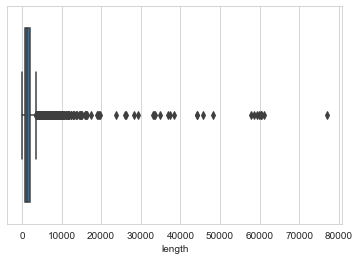

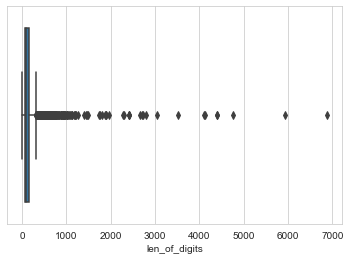

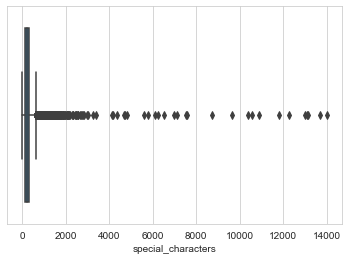

In [55]:

sns.boxplot('length',hue='target',data=dt)
plt.figure()
sns.boxplot('len_of_digits',hue='target',data=dt)
plt.figure()
sns.boxplot('special_characters',hue='target',data=dt)

* By looking at the above plots we cannot visualize data by using box plots
* but we can clearly observe one thing is 95% of data are present in starting ranges of the plot remaining all are outliers

### violinplot on length and upper case features

<AxesSubplot:xlabel='length', ylabel='upper_case'>

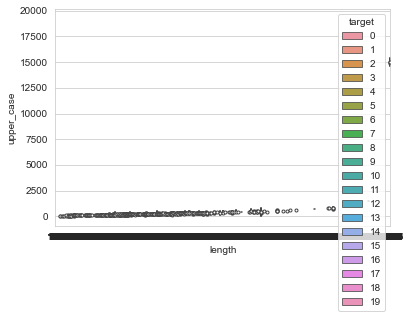

In [57]:
sns.violinplot(x='length',y='upper_case',hue='target',data=dt)

* Here also we cannot visualize the data properly
* lets try another plots

In [58]:
dt

,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,no_of_words,target
0,1268,95,214,467,326,52,82,12
1,1053,65,153,468,242,37,53,2
2,491,49,99,166,127,19,38,11
3,946,69,164,331,233,49,71,16
4,2775,224,593,1001,578,110,167,3
...,...,...,...,...,...,...,...,...
5626,1137,103,203,404,274,48,82,8
5627,1116,46,173,515,249,37,67,1
5628,2492,193,445,954,531,160,228,0
5629,1264,88,208,486,330,58,75,3


## Scatter plot on Feature Length Vs rest

Text(0.5, 1.0, 'length vs length')

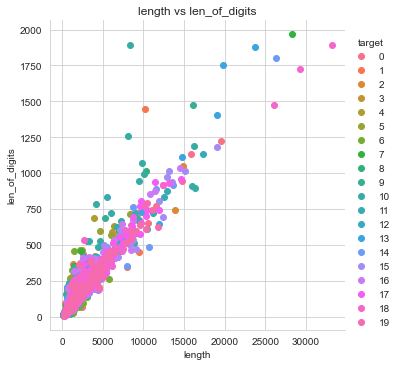

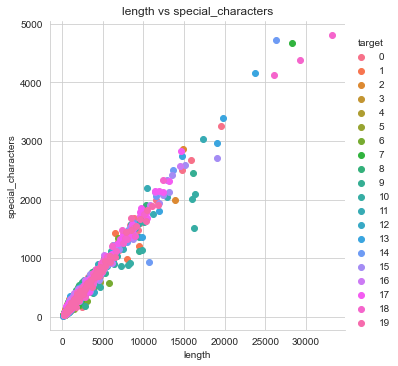

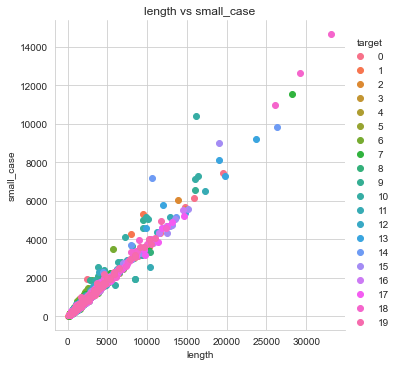

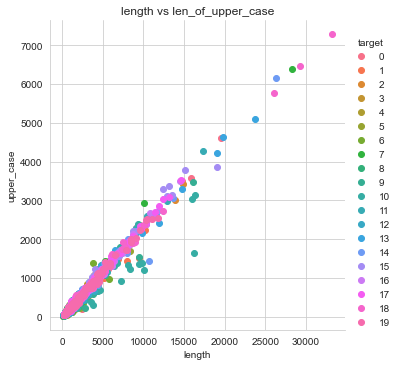

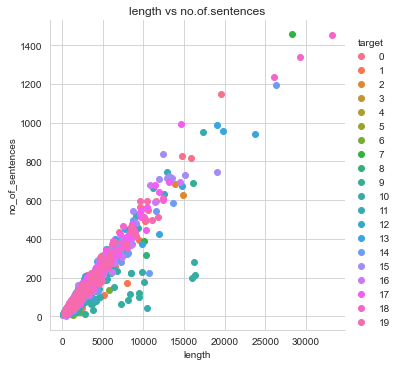

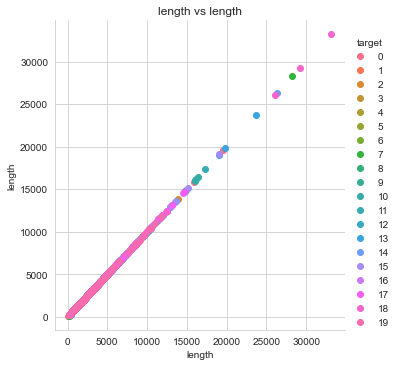

In [59]:
# scatterplot on Length feature vs rest of the features using seaborn

#plt.subplot(2,3,1)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','len_of_digits')\
    .add_legend()
plt.title("length vs len_of_digits")    


#plt.subplot(2,3,2)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','special_characters')\
    .add_legend()
plt.title("length vs special_characters")    


#plt.subplot(2,3,3)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','small_case')\
    .add_legend()
plt.title("length vs small_case")    


#plt.subplot(2,3,4)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','upper_case')\
    .add_legend()
plt.title("length vs len_of_upper_case")    


#plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','no_of_sentences')\
    .add_legend()
plt.title("length vs no.of.sentences")    


#plt.subplot(2,3,6)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'length','length')\
    .add_legend()
plt.title("length vs length")    





* we cannot visualize how the features are impacting target on all plots but few are able to classify.
* By looking at the length and len_of_digits scatter plot we can observe class group 10 with the values of near to 10000 and 1000
* By looking at the length and small case scatter plot we can observe class group 10 with the values of near (15000 to 18000) and (6000 to 8000)
* By looking at the length and no.of.sentences scatter plot we can observe class group 10 with the values of near (5000 to 17000) and (0 to 300)
### Conculsion
* few features with length are able to classify and remaining features are not useful

## scatter plot on len_of_digits vs rest

Text(0.5, 1.0, 'len_of_digits vs no_of_sentences')

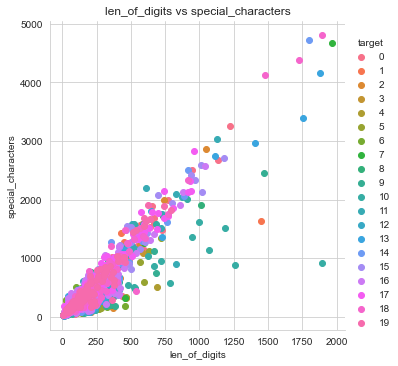

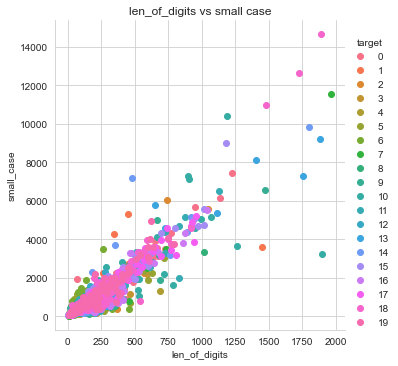

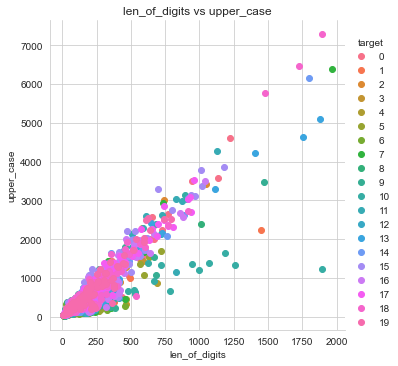

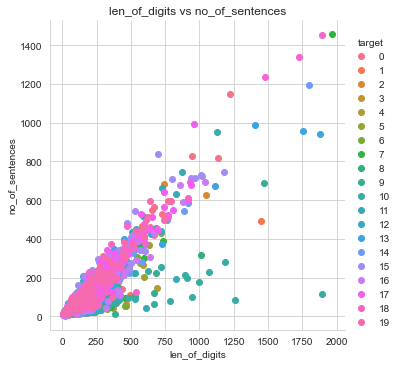

In [60]:

# #plt.subplot(2,3,1)
# sns.set_style('whitegrid')
# sns.FacetGrid(data,hue='target',height=5)\
#     .map(plt.scatter,'len_of_digits','len_of_digits')\
#     .add_legend()


#plt.subplot(2,3,2)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'len_of_digits','special_characters')\
    .add_legend()
plt.title("len_of_digits vs special_characters")    

#plt.subplot(2,3,3)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'len_of_digits','small_case')\
    .add_legend()
plt.title("len_of_digits vs small case")    

#plt.subplot(2,3,4)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'len_of_digits','upper_case')\
    .add_legend()
plt.title("len_of_digits vs upper_case")    

#plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'len_of_digits','no_of_sentences')\
    .add_legend()
plt.title("len_of_digits vs no_of_sentences")  

# #plt.subplot(2,3,6)
# sns.set_style('whitegrid')
# sns.FacetGrid(data,hue='target',height=5)\
#     .map(plt.scatter,'len_of_digits','length')\
#     .add_legend()





 * scatter plots on len_of_digits feature vs rest of the features
 * All the plots are not able to classify all the groups
 * if we observe len_of_digits and upper case scatter plot the we can   classify for class group 11 
 * if we observe len_of_digits and no.of_sentence scatter plot class group 11 can easily classify in range of (500 to 1250) and (0 to 200)
 ### conclusion
 * no.of.sentences , upper case features vs length are useful  

## scatter plot on special_character features vs rest

Text(0.5, 1.0, 'special_characters vs no.of.sentences')

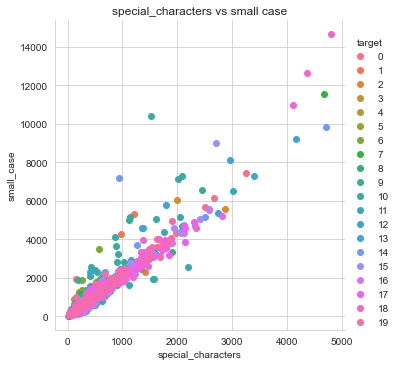

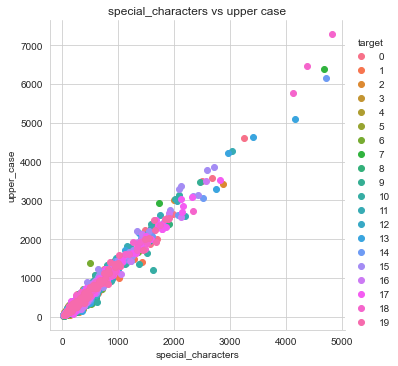

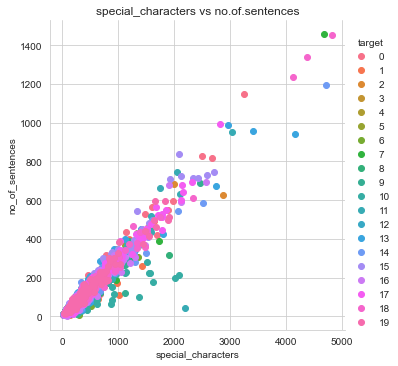

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'special_characters','small_case')\
    .add_legend()
plt.title("special_characters vs small case")    

#plt.subplot(2,3,4)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'special_characters','upper_case')\
    .add_legend()
plt.title("special_characters vs upper case")    

#plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'special_characters','no_of_sentences')\
    .add_legend()
plt.title("special_characters vs no.of.sentences")  


 * There is nothing to classify the class groups by looking at the above plots.
 * In special characters and no.of.sentences scatter plot ,some points of class group 11 are able visualize but those are very near to another class groups. so its hard to classify

### conclusion
* special_characters vs rest of the features are not good for classification

 ## scatter plots on smallcase vs upper case , no.of.sentences

Text(0.5, 1.0, 'small case vs no.of.sentences')

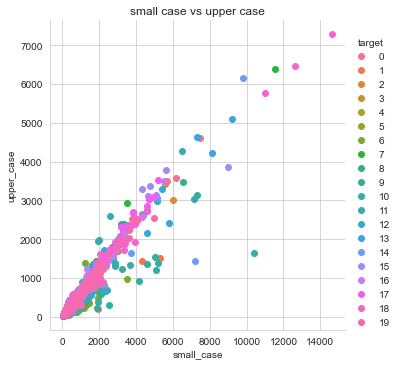

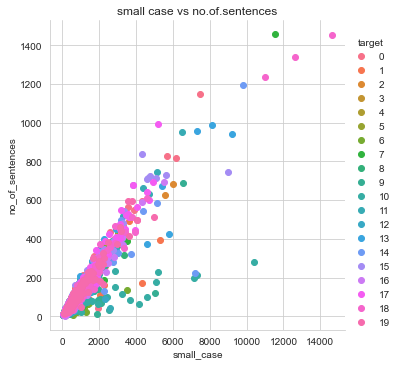

In [62]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'small_case','upper_case')\
    .add_legend()
plt.title("small case vs upper case")    

#plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'small_case','no_of_sentences')\
    .add_legend()
plt.title("small case vs no.of.sentences")  

* small case vs upper case plot is hard to visualize because of lot of ovelapping
* In small case vs no.of.sentences plot we can see there is some area like (2200 to 5500) and (0 to 200) , we can see classgroup 11 points

### conclusion
* no.of.sentences vs small case plot might be useful to classify

## scatter plot on upper case vs no.of.sentence

Text(0.5, 1.0, 'upper case vs no_of_sentences')

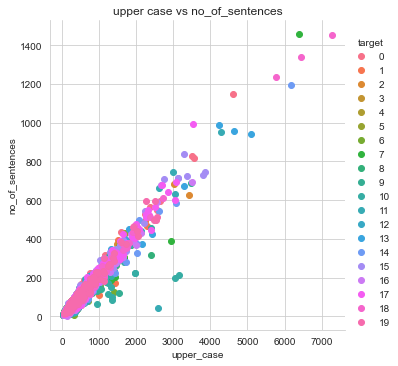

In [63]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'upper_case','no_of_sentences')\
    .add_legend()
plt.title("upper case vs no_of_sentences")  

* scatter plot on upper case vs no.of.sentences
* all the points are very near to each other (overlapping) , it was difficult to classify using these features together
### conclusion
* uppercase vs no.of.sentences might not be useful to classify

## scatter plot on no_of_words vs rest of the features

Text(0.5, 1.0, 'no_of_words vs no_of_words')

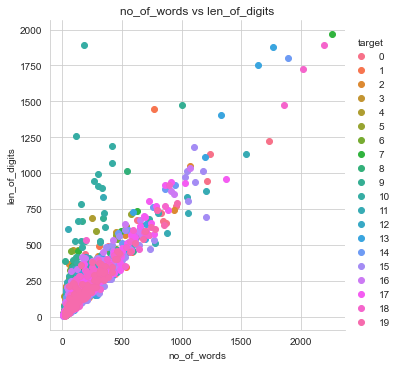

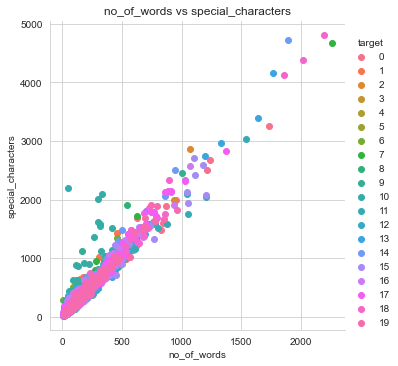

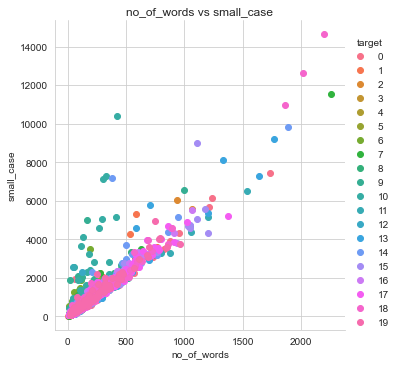

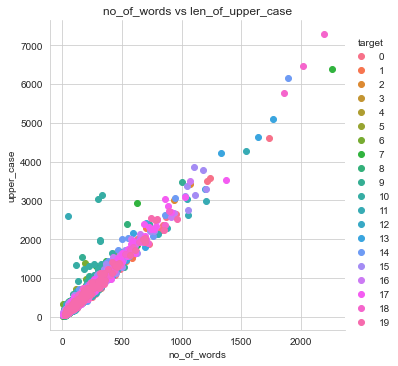

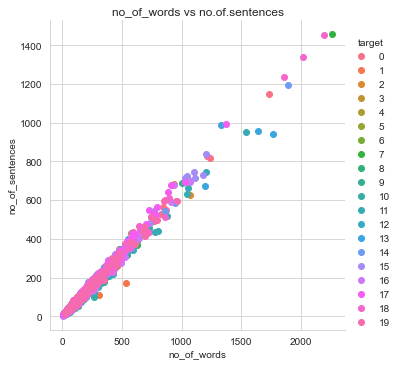

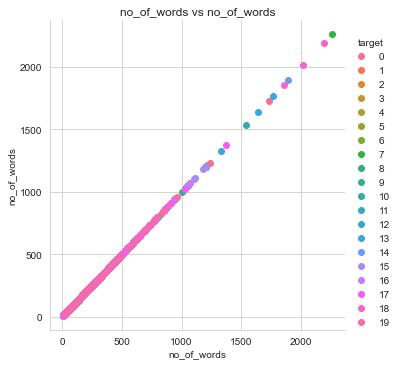

In [64]:
# scatterplot on no_of_words feature vs rest of the features using seaborn

#plt.subplot(2,3,1)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','len_of_digits')\
    .add_legend()
plt.title("no_of_words vs len_of_digits")    


#plt.subplot(2,3,2)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','special_characters')\
    .add_legend()
plt.title("no_of_words vs special_characters")    


#plt.subplot(2,3,3)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','small_case')\
    .add_legend()
plt.title("no_of_words vs small_case")    


#plt.subplot(2,3,4)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','upper_case')\
    .add_legend()
plt.title("no_of_words vs len_of_upper_case")    


#plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','no_of_sentences')\
    .add_legend()
plt.title("no_of_words vs no.of.sentences")    


#plt.subplot(2,3,6)
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='target',height=5)\
    .map(plt.scatter,'no_of_words','no_of_words')\
    .add_legend()
plt.title("no_of_words vs no_of_words")    





In [65]:
#x_train=x_train.drop(['log_value'],axis=1)
x_train

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,ID_48096b7a9,12,1268,95,214,467,326,52,22.518203,1.687089,0.010764,82,6.146329
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,ID_a2d6e55f4,2,1053,65,153,468,242,37,18.700053,1.154324,0.007659,53,6.148468
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,ID_9dde342f6,11,491,49,99,166,127,19,8.719588,0.870183,0.003933,38,5.111988
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,ID_b637c2642,16,946,69,164,331,233,49,16.799858,1.225360,0.010143,71,5.802118
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,ID_51b0f15e7,3,2775,224,593,1001,578,110,49.280767,3.977979,0.022770,167,6.908755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,W)(7y77%HH;Hql;h(7T;7Nh(7y^C;h %M1yC%HH;Hq/sy...,ID_c52813363,8,1137,103,203,404,274,48,20.191795,1.829160,0.009936,82,6.001415
5627,_)q%H;i%v;(HyPv%HL()ryp;HM%)y@hhM1M)%v()yGMHv...,ID_bcf3c2d23,1,1116,46,173,515,249,37,19.818860,0.816906,0.007659,67,6.244167
5628,W)(7yL)%H8lXjI0P+&nNcch y^W)%H8y_UX3\nM)/syPc...,ID_ad45bfbe4,0,2492,193,445,954,531,160,44.255017,3.427455,0.033120,228,6.860664
5629,W)(7y7;h %M1l4MTvM)N\t-ONrMy^C;h %M1y\tM) %)r...,ID_99ab693a9,3,1264,88,208,486,330,58,22.447167,1.562777,0.012006,75,6.186209


In [67]:
x_train.to_csv('FE_traindata.csv',index=False)
x_test.to_csv('FE_testdata.csv',index= False)

## correlation using heatmap

In [66]:
all_features = x_train.drop(['Id','target'],axis=1)
all_features

,ciphertext,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,1268,95,214,467,326,52,22.518203,1.687089,0.010764,82,6.146329
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,1053,65,153,468,242,37,18.700053,1.154324,0.007659,53,6.148468
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,491,49,99,166,127,19,8.719588,0.870183,0.003933,38,5.111988
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,946,69,164,331,233,49,16.799858,1.225360,0.010143,71,5.802118
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,2775,224,593,1001,578,110,49.280767,3.977979,0.022770,167,6.908755
...,...,...,...,...,...,...,...,...,...,...,...,...
5626,W)(7y77%HH;Hql;h(7T;7Nh(7y^C;h %M1yC%HH;Hq/sy...,1137,103,203,404,274,48,20.191795,1.829160,0.009936,82,6.001415
5627,_)q%H;i%v;(HyPv%HL()ryp;HM%)y@hhM1M)%v()yGMHv...,1116,46,173,515,249,37,19.818860,0.816906,0.007659,67,6.244167
5628,W)(7yL)%H8lXjI0P+&nNcch y^W)%H8y_UX3\nM)/syPc...,2492,193,445,954,531,160,44.255017,3.427455,0.033120,228,6.860664
5629,W)(7y7;h %M1l4MTvM)N\t-ONrMy^C;h %M1y\tM) %)r...,1264,88,208,486,330,58,22.447167,1.562777,0.012006,75,6.186209


<AxesSubplot:>

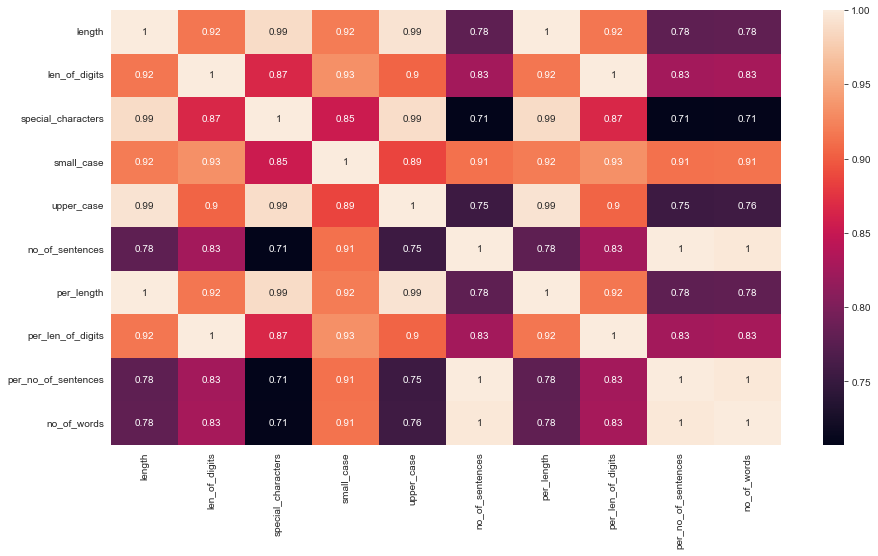

In [92]:

plt.figure(figsize=(15,8))
sns.heatmap(all_features.corr(),annot=True)

 * we are checking the correlation using Heatmap.
 * By looking into heatmap we can say polarity scores are not useful except the compound , somewhat it has a relationship with other features.
 * There are some features which are having correlation 1 but those are identical like lenght and %_length.
 * Every feature is positive correlated with other features except the polarity scores.
 * length have a good relation with all other features , it has high correlation compared to other features.